In [100]:
import healpy as hp
import numpy as np

NSIDE = 12

healpix_arr = np.array(list(range(NSIDE**2 * 12)))

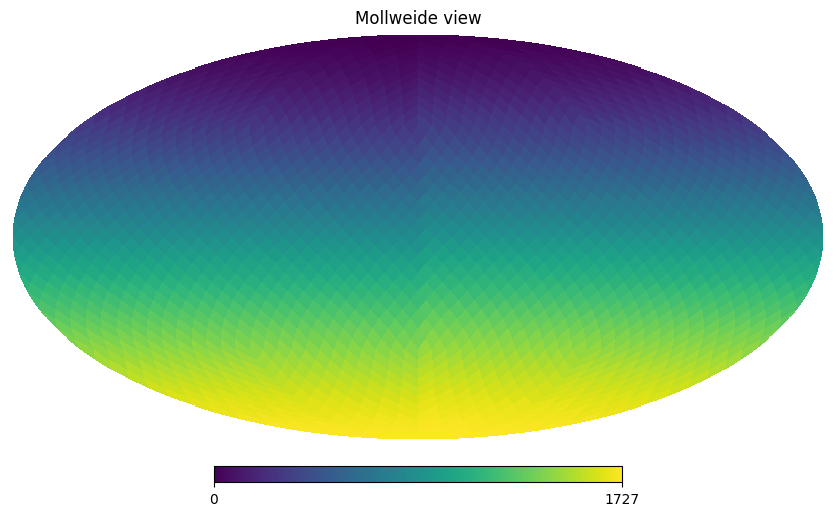

In [101]:
hp.mollview(healpix_arr)

(64, 128)


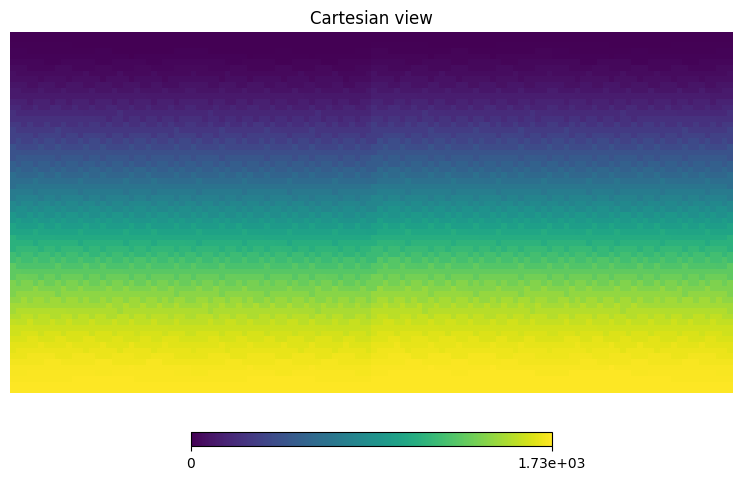

In [102]:
cart_arr = hp.cartview(healpix_arr, xsize=128, ysize=64, return_projected_map=True)
print(cart_arr.shape)

In [114]:
# def find_pos(value):
#     for r in range(len(cart_arr)):
#         for c in range(len(cart_arr[0])):
#             if cart_arr[r][c] == value:
#                 return r, c
#     return -1, -1

# pos_map = {}

# for value in healpix_arr:
#     pos = find_pos(value)

#     if pos in pos_map:
#         print('POS:', pos, 'VALUE: ', value, 'is repeated.')
    
#     pos_map[pos] = value

pos_map = {}

for r in range(len(cart_arr)):
    for c in range(len(cart_arr[0])):
        for value in healpix_arr:
            pos = (r, c)
            if cart_arr[r][c] == value:
                pos_map[pos] = value
    
    if r % 10 == 0:
        print("Row ", r, ' completed')
            

Row  0  completed
Row  10  completed
Row  20  completed
Row  30  completed
Row  40  completed
Row  50  completed
Row  60  completed


In [115]:
len(list(pos_map.keys()))

8192

In [116]:
len(set(pos_map.keys()))

8192

In [109]:
def print_repeats(lst):
    count_dict = {}
    
    # Count occurrences of each value in the list
    for item in lst:
        count_dict[item] = count_dict.get(item, 0) + 1
    
    # Print the repeated values
    for key, value in count_dict.items():
        if value > 1:
            print(f"{key} is repeated {value} times.")

print_repeats(pos_map.values())

TypeError: unhashable type: 'list'

In [117]:
pos_map

{(0, 0): 1726,
 (0, 1): 1725,
 (0, 2): 1725,
 (0, 3): 1725,
 (0, 4): 1725,
 (0, 5): 1725,
 (0, 6): 1725,
 (0, 7): 1725,
 (0, 8): 1725,
 (0, 9): 1725,
 (0, 10): 1725,
 (0, 11): 1725,
 (0, 12): 1725,
 (0, 13): 1725,
 (0, 14): 1725,
 (0, 15): 1725,
 (0, 16): 1725,
 (0, 17): 1725,
 (0, 18): 1725,
 (0, 19): 1725,
 (0, 20): 1725,
 (0, 21): 1725,
 (0, 22): 1725,
 (0, 23): 1725,
 (0, 24): 1725,
 (0, 25): 1725,
 (0, 26): 1725,
 (0, 27): 1725,
 (0, 28): 1725,
 (0, 29): 1725,
 (0, 30): 1725,
 (0, 31): 1725,
 (0, 32): 1724,
 (0, 33): 1724,
 (0, 34): 1724,
 (0, 35): 1724,
 (0, 36): 1724,
 (0, 37): 1724,
 (0, 38): 1724,
 (0, 39): 1724,
 (0, 40): 1724,
 (0, 41): 1724,
 (0, 42): 1724,
 (0, 43): 1724,
 (0, 44): 1724,
 (0, 45): 1724,
 (0, 46): 1724,
 (0, 47): 1724,
 (0, 48): 1724,
 (0, 49): 1724,
 (0, 50): 1724,
 (0, 51): 1724,
 (0, 52): 1724,
 (0, 53): 1724,
 (0, 54): 1724,
 (0, 55): 1724,
 (0, 56): 1724,
 (0, 57): 1724,
 (0, 58): 1724,
 (0, 59): 1724,
 (0, 60): 1724,
 (0, 61): 1724,
 (0, 62): 1724,
 (

In [118]:
reconstructed = [0] * len(healpix_arr)

for pos, value in pos_map.items():
    r, c = pos 
    reconstructed[value] = cart_arr[r][c]

reconstructed = np.array(reconstructed)

In [119]:
print(reconstructed)

[0.000e+00 1.000e+00 2.000e+00 ... 1.725e+03 1.726e+03 1.727e+03]


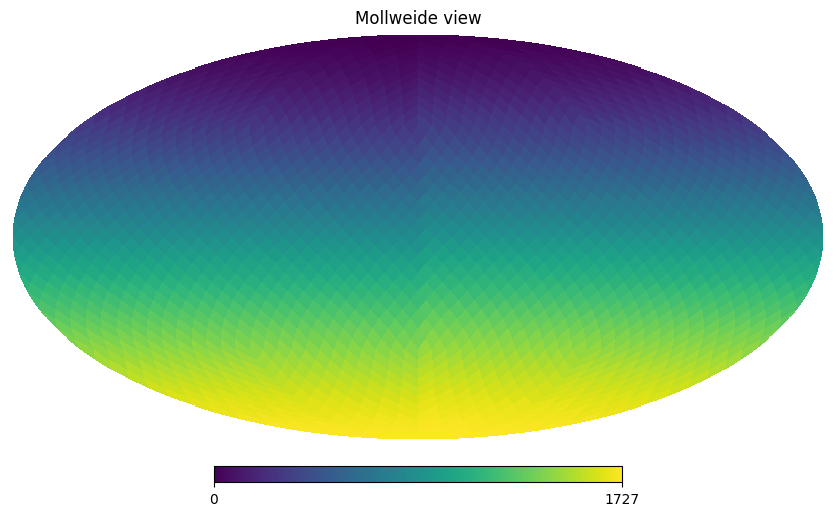

In [124]:
hp.mollview(reconstructed)

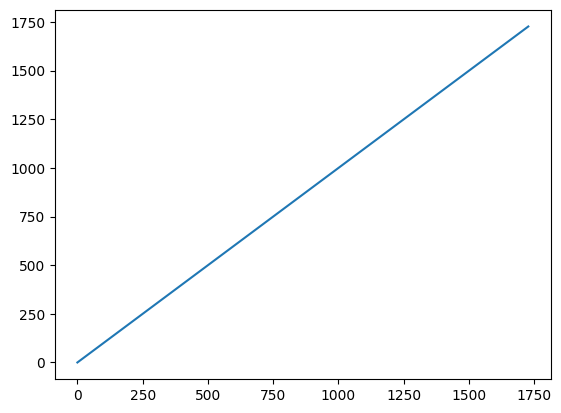

In [127]:
import matplotlib.pyplot as plt

plt.plot(range(len(healpix_arr)), reconstructed)